In [1]:
import os
import pandas as pd
from shutil import copyfile
import numpy as np
import math
from PIL import Image

In [2]:
def parse_iml():
    file_path = 'D:\\Distance Measurement\\images_tmatched.iml'
    output_file_path = 'D:\\Distance Measurement\\images_tmatched.csv'
    f_output = open(output_file_path, 'w')

    with open(file_path, 'r') as file_object:
        line = file_object.readline()
        img_info = ''
        while line:
            
            if line.find('Xyz=') != -1:
                print(line)
                img_info = img_info + ' ' + line
                
            if line.find('.jpg') != -1:
                print(line)
                img_info = process_img_info(img_info)
                f_output.write(img_info)
                img_info = line


            line = file_object.readline().strip()

    f_output.close()

def process_img_info(img_info):
    print(img_info)
    img_info = img_info.replace('=', ' ')
    img_info = img_info + '\n'
    a = 0
    return img_info


In [ ]:
parse_iml()

In [127]:
def select_img(sign_x, sign_y):

    # yellow recctangle row 8
    # sign_x = 135374.04
    # sign_y = 399504.64
    # red_triangle_downword	135279.554	399389.056
    # sign_x = 135279.554
    # sign_y = 399389.056

    # red_circle_obstruction	135470.324	399679.618
    # yellow_rectangle	135381.225	399535.479
# red_triangle_downword	135279.554	399389.056
# white_rectangle	135283.862	399401.01
# inactive	135137.17	399106.46
# red_circle_obstruction	135189.919	399199.926
# yellow_rectangle	135152.33	399145.71



    #sign_x = 135511.79
    #sign_y = 399687.64

    # blue_rectangle_speed_limit	135179.94	399169.1

    src_dir = '\\\\192.168.0.5\\work\\Work\\prjdata\\AO34\\Panoramas'
    dest_dir = 'D:\\Distance Measurement\\Panaromas'

    iml_file_path = 'D:\\Distance Measurement\\images_tmatched2.csv'
    df_iml = pd.read_csv(iml_file_path, delimiter=' ')

    for index, row in df_iml.iterrows():
        x = row['x']
        y = row['y']
        img_name = row['image_name']

        if abs(sign_x -x) < 10 and abs(sign_y - y) < 10 and abs(sign_x -x) > 5 and abs(sign_y - y) > 5:
            print(img_name)
            src_file = os.path.join(src_dir, img_name)
            dest_file = os.path.join(dest_dir, img_name)
            copyfile(src_file, dest_file)


        #b = 0
    #a = 0

In [130]:
sign_x, sign_y = 135377.885, 399511.688

In [131]:
select_img(sign_x, sign_y)

stream_00001-000000_00344_0000439.jpg
stream_00003-000000_00294_0000849.jpg
stream_00003-000000_00295_0000850.jpg
stream_00003-000000_00296_0000851.jpg
stream_00003-000000_00297_0000852.jpg
stream_00003-000000_00298_0000853.jpg
stream_00003-000000_00299_0000854.jpg


In [1]:
iml_file_path = 'D:\\Distance Measurement\\images_tmatched2.csv'

In [16]:
sign_csv_path = r'D:\Distance Measurement\street_sign_location.csv'

In [4]:
df_iml = pd.read_csv(iml_file_path, delimiter=' ')

In [17]:
df_sign = pd.read_csv(sign_csv_path)

In [6]:
df_iml.head()

,image,image_name,xyz,x,y,z,accuracyxyz,accuracy,Unnamed: 8
0,Image,stream_00000-000000_00000_0000000.jpg,Xyz,134884.076,399072.561,15.876,AccuracyXyz,0.015,NaN
1,Image,stream_00000-000000_00001_0000001.jpg,Xyz,134884.352,399071.471,15.868,AccuracyXyz,0.015,NaN
2,Image,stream_00000-000000_00002_0000002.jpg,Xyz,134884.796,399070.559,15.865,AccuracyXyz,0.015,NaN
3,Image,stream_00000-000000_00003_0000003.jpg,Xyz,134885.212,399069.737,15.842,AccuracyXyz,0.015,NaN
4,Image,stream_00000-000000_00004_0000004.jpg,Xyz,134885.755,399069.032,15.835,AccuracyXyz,0.015,NaN


In [19]:
df_sign.head()

,LAYER,x,y
0,blue_rectangle_direction,135511.790,399687.640
1,blue_rectangle,135456.988,399616.634
2,blue_circle_cycle,135460.973,399696.037
3,blue_circle_inclined,135287.627,399377.245
4,blue_circle_inclined,135285.761,399373.625


In [22]:
def get_sign_xval_yval(give_index):

    for index, row in df_sign.iterrows():
        if index == give_index:
            x_val = df_sign['x'][index]
            y_val = df_sign['y'][index]

    print(x_val, y_val)
    return x_val, y_val

In [15]:
#img_name = 'stream_00000-000000_00001_0000001.jpg'
def get_car_xval_yval(img_name):

    index = 0

    for i in df_iml['image_name']:
        if i == img_name:
            x_val = df_iml['x'][index]
            y_val = df_iml['y'][index]

        index +=1

    print(x_val, y_val)
    return x_val, y_val

134884.352


In [ ]:
 for index, row in df_iml.iterrows():
        x = row['x']
        y = row['y']
        img_name = row['image_name']

In [ ]:
x

In [ ]:
select_img()

In [ ]:
src_dir = '\\\\192.168.0.5\\work\\Work\\prjdata\\AO34\\Panoramas'

In [ ]:
for i in os.listdir(src_dir):
    print(i)

In [82]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

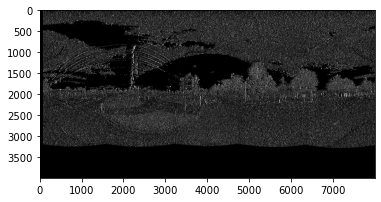

In [12]:
imgL = cv.imread(r'D:\Distance Measurement\Panaromas\stream_00006-000000_00096_0002405.jpg',0)
imgR = cv.imread(r'D:\Distance Measurement\Panaromas\stream_00006-000000_00097_0002406.jpg',0)
stereo = cv.StereoBM_create(numDisparities=64, blockSize=5)
disparity = stereo.compute(imgL,imgR)
cv.imwrite('disparity1.jpg', disparity)
plt.imshow(disparity,'gray')
plt.show()

In [25]:
disparity

array([[-16, -16, -16, ..., -16, -16, -16],
       [-16, -16, -16, ..., -16, -16, -16],
       [-16, -16, -16, ..., -16, -16, -16],
       ...,
       [-16, -16, -16, ..., -16, -16, -16],
       [-16, -16, -16, ..., -16, -16, -16],
       [-16, -16, -16, ..., -16, -16, -16]], dtype=int16)

In [50]:
df_iml.head()

,image,image_name,xyz,x,y,z,accuracyxyz,accuracy,Unnamed: 8
0,Image,stream_00000-000000_00000_0000000.jpg,Xyz,134884.076,399072.561,15.876,AccuracyXyz,0.015,NaN
1,Image,stream_00000-000000_00001_0000001.jpg,Xyz,134884.352,399071.471,15.868,AccuracyXyz,0.015,NaN
2,Image,stream_00000-000000_00002_0000002.jpg,Xyz,134884.796,399070.559,15.865,AccuracyXyz,0.015,NaN
3,Image,stream_00000-000000_00003_0000003.jpg,Xyz,134885.212,399069.737,15.842,AccuracyXyz,0.015,NaN
4,Image,stream_00000-000000_00004_0000004.jpg,Xyz,134885.755,399069.032,15.835,AccuracyXyz,0.015,NaN


# Final Code

In [2]:
import os
import pandas as pd
from shutil import copyfile
import numpy as np
import math
import cv2
from pyproj import Proj, transform

In [2]:
def select_img(sign_x, sign_y):

    src_dir = '\\\\192.168.0.5\\work\\Work\\prjdata\\AO34\\Panoramas'
    dest_dir = 'D:\\Distance Measurement\\Panaromas'

    iml_file_path = 'D:\\Distance Measurement\\images_tmatched2.csv'
    df_iml = pd.read_csv(iml_file_path, delimiter=' ')

    for index, row in df_iml.iterrows():
        x = row['x']
        y = row['y']
        img_name = row['image_name']

        if abs(sign_x -x) < 10 and abs(sign_y - y) < 10 and abs(sign_x -x) > 5 and abs(sign_y - y) > 5:
            print(img_name)
            src_file = os.path.join(src_dir, img_name)
            dest_file = os.path.join(dest_dir, img_name)
            #copyfile(src_file, dest_file)


In [3]:
iml_file_path = 'D:\\Distance Measurement\\images_tmatched2.csv'
sign_csv_path = r'D:\Distance Measurement\street_sign_location.csv'
df_iml = pd.read_csv(iml_file_path, delimiter=' ')
df_sign = pd.read_csv(sign_csv_path)

In [18]:
give_index = 3
x_sign, y_sign = get_sign_xval_yval(give_index) 

blue_rectangle 135456.988 399616.634


In [19]:
select_img(x_sign, y_sign)

stream_00001-000000_00378_0000473.jpg
stream_00005-000000_00075_0002261.jpg
stream_00005-000000_00076_0002262.jpg
stream_00005-000000_00077_0002263.jpg
stream_00005-000000_00078_0002264.jpg
stream_00005-000000_00079_0002265.jpg
stream_00006-000000_00195_0002504.jpg
stream_00006-000000_00196_0002505.jpg
stream_00006-000000_00197_0002506.jpg


In [20]:
def get_car_xval_yval(img_name):

    index = 0

    for i in df_iml['image_name']:
        if i == img_name:
            x_val = df_iml['x'][index]
            y_val = df_iml['y'][index]

        index +=1

    print(x_val, y_val)
    return x_val, y_val

In [21]:
def get_sign_xval_yval(give_index):
    actual_index = give_index - 2
    
    for index, row in df_sign.iterrows():
        if index == actual_index:
            x_val = df_sign['x'][index]
            y_val = df_sign['y'][index]
            sign_name = df_sign['LAYER'][index]

    print(sign_name, x_val, y_val)
    return x_val, y_val

In [83]:
img_name1, img_name2, index = 'stream_00006-000000_00192_0002501.jpg', 'stream_00006-000000_00193_0002502.jpg', give_index

In [84]:
sign_x, sign_y = get_sign_xval_yval(index) 

blue_rectangle 135456.988 399616.634


In [85]:
car_1_x, car_1_y = get_car_xval_yval(img_name1)

135453.169 399615.474


In [86]:
car_2_x, car_2_y = get_car_xval_yval(img_name2)

135452.042 399613.722


In [26]:
def convert_epsg_to_wgs84(epsg_x, epsg_y):
    p1 = Proj(init='epsg:28992')
    p2 = Proj(proj='latlong',datum='WGS84')
    
    # Transform point (155000.0, 446000.0) with EPSG:28992
    lon, lat, z = transform(p1, p2, epsg_x, epsg_y, 0.0)
    print(lon, lat, z) 
    return lat, lon

In [27]:
middle_x = (car_1_x+car_2_x)/2           
middle_y = (car_1_y+car_2_y)/2 

In [28]:
sign_lon, sign_lat = convert_epsg_to_wgs84(sign_x, sign_y)
car1_lon, car1_lat = convert_epsg_to_wgs84(car_1_x, car_1_y)
car2_lon, car2_lat = convert_epsg_to_wgs84(car_2_x, car_2_y)
middle_lon, middle_lat = convert_epsg_to_wgs84(middle_x, middle_y)

5.10522186252534 51.58512457450844 0.0
5.105166824861621 51.58511401502773 0.0
5.105150661780166 51.585098227986265 0.0
5.105158743319488 51.58510612150729 0.0


C:\Users\HSSL107\anaconda3\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
<ipython-input-26-85d62b58bcc2>:6: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  lon, lat, z = transform(p1, p2, epsg_x, epsg_y, 0.0)
C:\Users\HSSL107\anaconda3\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_strin

In [29]:
def angle_From_Coordinate(lat1,  long1,  lat2, long2):
    '''
    '''
    lat2 = math.radians(lat2)
    long2 = math.radians(long2)
    lat1 = math.radians(lat1)
    long1 = math.radians(long1)
    '''
    '''
    dLon = long2 - long1
    
    y = math.sin(dLon) * math.cos(lat2)
    print(y)
    print(lat2)
    print(dLon)
    x = math.cos(lat1) * math.sin(lat2) - math.sin(lat1)* math.cos(lat2) * math.cos(dLon)

    angle = math.atan2(y, x)

    angle = math.degrees(angle)
    angle = (angle + 360) % 360
    angle = 360 - angle; # count degrees counter-clockwise - remove to make clockwise

    print(angle)
    return angle

In [30]:
angle = angle_From_Coordinate(car1_lat, car1_lon, car2_lat, car2_lon)

-2.744428212890939e-07
0.08910168785843134
-2.7553585268957903e-07
135.78814962487778


In [31]:
print(math.sin(math.radians(90)))

1.0


In [32]:
def calculate_distance_from_latlon(lat1, lon1, lat2, lon2):
    R = 6371.0
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c * 1000

    print(distance)
    return distance 

In [33]:
car1_obj = calculate_distance_from_latlon(sign_lat, sign_lon, car1_lat, car1_lon)

6.230651868027858


In [34]:
car1_car2 = calculate_distance_from_latlon(car1_lat, car1_lon, car2_lat, car2_lon)

2.5074454352040036


In [35]:
car2_obj = calculate_distance_from_latlon(sign_lat, sign_lon, car2_lat, car2_lon)

8.437774797862696


In [36]:
from PIL import Image

In [37]:
def calculating_bbx_pixel(x_center, y_center, width, height, img_dir):
    x_min = x_center - width/2
    x_max = x_center + width/2
    
    y_min = y_center - height/2
    y_max = y_center + height/2
    
    im = Image.open(img_dir)
    img_width, img_height = im.size
    
    x_center_p = x_center * img_width
    y_center_p = y_center * img_height
    
    x_min_p = x_min * img_width
    x_max_p = x_max * img_width
    
    y_min_p = y_min * img_height
    y_max_p = y_max * img_height
    
    print(x_center_p, y_center_p, x_min_p, x_max_p, y_min_p, y_max_p)
    return x_center_p, y_center_p, x_min_p, x_max_p, y_min_p, y_max_p

In [71]:
img_name1, img_name2

('stream_00006-000000_00192_0002501.jpg',
 'stream_00006-000000_00193_0002502.jpg')

row 2, ('stream_00006-000000_00096_0002405.jpg', 'stream_00006-000000_00097_0002406.jpg')

row 3, ('stream_00006-000000_00192_0002501.jpg', 'stream_00006-000000_00193_0002502.jpg')

row 8, ('stream_00001-000000_00343_0000438.jpg', 'stream_00001-000000_00344_0000439.jpg')

row 75, ('stream_00003-000000_00713_0001268.jpg', 'stream_00003-000000_00714_0001269.jpg')

row 76, ('stream_00003-000000_00711_0001266.jpg', 'stream_00003-000000_00712_0001267.jpg')

In [72]:
def get_bbx_param(text_file_path):
    file = open(text_file_path)
    output_lst = file.read().split(' ')
    x_center, y_center, width, height = float(output_lst[1]), float(output_lst[2]), float(output_lst[3]), float(output_lst[4])
    
    print(x_center, y_center, width, height)
    return x_center, y_center, width, height

In [73]:
def get_names(img_name1, img_name2):

    or_name1 = os.path.splitext(img_name1)[0]
    or_name2 = os.path.splitext(img_name2)[0]

    f_name1 = or_name2 + '.txt'
    f_name2 = or_name2 + '.txt'

    base_path = r'D:\Distance Measurement\Panaromas'

    text_file_path_l = os.path.join(base_path, f_name1)
    text_file_path_r = os.path.join(base_path, f_name1)

    img_name_l = os.path.join(base_path, img_name1)
    img_name_r = os.path.join(base_path, img_name2)

In [74]:
or_name = os.path.splitext(img_name1)[0]
f_name = or_name + '.txt'
f_name

'stream_00006-000000_00192_0002501.txt'

In [82]:
text_file_path_l = r'D:\Distance Measurement\Panaromas\stream_00006-000000_00192_0002501.txt'
text_file_path_r = r'D:\Distance Measurement\Panaromas\stream_00006-000000_00193_0002502.txt'

img_name_l = r'D:\Distance Measurement\Panaromas\stream_00006-000000_00192_0002501.jpg'
img_name_r = r'D:\Distance Measurement\Panaromas\stream_00006-000000_00193_0002502.jpg'

In [76]:
x_center_l, y_center_l, width_l, height_l = get_bbx_param(text_file_path_l)

0.627691 0.479061 0.020933 0.016497


In [77]:
x_center_r, y_center_r, width_r, height_r = get_bbx_param(text_file_path_r)

0.587919 0.483503 0.016746 0.01269


In [78]:
x_center_p_l, y_center_p_l, x_min_p_l, x_max_p_l, y_min_p_l, y_max_p_l = calculating_bbx_pixel(x_center_l, y_center_l, 
                                                                                               width_l, height_l, img_name_l)

5021.528 1916.2440000000001 4937.795999999999 5105.26 1883.25 1949.238


In [79]:
ul = x_center_p_l
vl = y_center_p_l
ur = x_center_p_r
vr = y_center_p_r

In [80]:
x_center_p_r, y_center_p_r, x_min_p_r, x_max_p_r, y_min_p_r, y_max_p_r = calculating_bbx_pixel(x_center_r, y_center_r,
                                                                                               width_r, height_r, img_name_r)

4703.352 1934.0120000000002 4636.368 4770.335999999999 1908.632 1959.392


In [81]:
def calculate_depth(baseline, focal_length, disparity):
    depth = baseline * focal_length / disparity
    print(depth)
    return depth

In [50]:
#disparity = ( (x_center_p_r - x_center_p_l)**2 + (y_center_p_r - y_center_p_l)**2 )**0.5
disparity = abs(x_center_p_l - x_center_p_r)
#dipsarity = x_center_p_l - x_center_p_r
baseline = car1_car2
#(ladibug 5 camrea pixel size is 3.45 um i.e. 1 pixel = 3.45 um and focal length is 4.4 mm. So we calculate focal length in 
#pixel)
#focal_length = (4.4 * 10e-3) / (3.45 * 10e-6) 
focal_length = 1024

In [51]:
depth = calculate_depth(baseline, focal_length, disparity)

8.069823385952732


row 2, blue_rectangle_direction,
perv. predicted depth = 14.496, current predicted depth = 11.6391
actual depth = 15.565, 17.934

row 8, yellow_rectangle,
prev. predicted depth = 10.798, current predicted depth = 8.67013
actual depth = 11.963, 7.222

row 3, blue_rectangle, prev. predicted depth = 10.050, current predicted depth = 8.0698, actual depth = 8.437, 6.230

row 75, red_circle_cycle , prev. predicted depth = 5.3213, current predicted depth = 4.273, actual depth = 5.7167, 2.854

row 76, red_circle_obstruction  , prev. predicted depth = 4.782, current predicted depth = 4.0783, actual depth = 3.938, 3.859

# Considering angle

In [52]:
by = car1_car2 * math.sin(math.radians(angle))
bx = car1_car2 * math.cos(math.radians(angle))

print(bx, by)

-1.797252635303771 1.7484752144137032


In [53]:
disparity_x = x_center_p_l - x_center_p_r
disparity_y = y_center_p_l - y_center_p_r

print(disparity_x, disparity_y)

318.1760000000004 -17.76800000000003


In [54]:
delz1 = bx * focal_length / disparity_x
delz2 = by * focal_length / disparity_y

print(delz1, delz2)

-5.784178248991311 -100.76759452721912


In [55]:
delz1/delz2

0.0574011742180558

In [56]:
focal_length2 = focal_length*delz1/delz2
print(focal_length, focal_length2)

1024 58.77880239928914


# Calculating x & y co-ordinate

In [57]:
#z = car1_obj
z = depth 
fx = focal_length
u = x_center_p_l
ox = 0

x1 = (z/fx) * (u-ox)
print(x1)

39.57308992931294


In [58]:
#z = car1_obj
z = depth 
fy = focal_length
v = y_center_p_l
oy = 0.70

y1 = (z/fy) * (v-oy)
print(y1)

15.095802507833438


In [59]:
z = car2_obj
fx = focal_length
u = x_center_p_r
ox = 0

x2 = (z/fx) * (u-ox)
print(x2)

38.755688448317485


In [60]:
z = depth
fy = focal_length
v = y_center_p_r
oy = 0.70

y2 = (z/fy) * (v-oy)
print(y2)

15.235826552678759


In [61]:
#y = math.sin(dLon) * math.cos(lat2)
#x = math.cos(lat1) * math.sin(lat2) - math.sin(lat1)* math.cos(lat2) * math.cos(dLon)

#5.10403132613173 51.58411502648751 0.0
#5.103929991139833 51.58407872776751 0.0
#5.103966373679415 51.58411435689469 0.0
#sign_lon, sign_lat = convert_epsg_to_wgs84(sign_x, sign_y)
#car1_lon, car1_lat = convert_epsg_to_wgs84(car_1_x, car_1_y)
#car2_lon, car2_lat = convert_epsg_to_wgs84(car_2_x, car_2_y)
print(car_1_x, car_1_y, car_2_x, car_2_y, sign_x, sign_y)

135453.169 399615.474 135452.042 399613.722 135456.988 399616.634


In [62]:
#lat2 = math.radians(lat2)
#lon2 = math.radians(lon2)
R = 6371 * 1000 
#lat1 = math.radians(car1_lat)
#lon1 = math.radians(car1_lon)
lat1 = math.radians(middle_lat)
lon1 = math.radians(middle_lon)
lat2 = math.radians(sign_lat)
lon2 = math.radians(sign_lon)

x11 = R * math.cos(lat1) * math.cos(lon1)
y11 = R * math.cos(lat1) * math.sin(lon1)
z11 = R * math.sin(lat1)

print(x11, y11, z11)

#x1 /= 1000
#y1 /= 1000
#z /= 1000

x1o, y1o, z1o = x11+x1, y11+y1, z11+z
#x1o, y1o, z1o = x11+x1, y11+y1, z11+z

print(x1o, y1o, z1o)

xo = R * math.cos(lat2) * math.cos(lon2)
yo = R * math.cos(lat2) * math.sin(lon2)
zo = R * math.sin(lat2)

print(xo, yo, zo)

lato = math.degrees(math.atan2(y1o, x1o))
lono = math.degrees(math.asin(z1o/R))

print(lato, lono)
print(sign_lon, sign_lat)

3942926.6094798488 4972079.641371498 566916.9181765777
3942966.182569778 4972094.737174006 566924.9879999636
3942924.6200843495 4972080.421904369 566923.9088695722
51.58491085188079 5.10523160603106
51.58512457450844 5.10522186252534


row 8 predicted 51.58415478129123 5.10402646518362 actual 51.58411502648751 5.10403132613173 distance 4.433

row 75 predicted 51.580769728776964 5.100505735688737 actual 51.580771870116756 5.100445775175575 distance 4.149

row 76 predicted 51.58077640703541 5.100607712667333 actual 51.58079248359838 5.100567844559459 distance 3.283

In [470]:
calculate_distance_from_latlon(middle_lat, middle_lon, sign_lat, sign_lon)

7.310042035458384


7.310042035458384

In [175]:
calculate_distance_from_latlon(51.580771870116756,  5.100445775175575,  51.58073099504531, 5.100478587272883)

5.079205299022312


5.079205299022312

In [88]:
car1_lat

51.58074675971054

In [240]:
depth2 = depth+x2-x1
depth2

-16.449768339088948

In [234]:
disparity = x_center_p_l - x_center_p_r
disparity

-667.4639999999998

In [235]:
depth = calculate_depth(baseline, focal_length, disparity)

-10.798399470854768


# Using HRP

In [385]:
def getRotationMatrix(angle_x, angle_y, angle_z):
    """
    Get rotation matrix
    :param angle_x: angle around x-axis in deg
    :param angle_y: angle around y-axis in deg
    :param angle_z: angle around z-axis in deg
    :return: 4x4 rotation matrix
    """
    alpha_x = angle_x * np.pi / 180.
    alpha_y = angle_y * np.pi / 180.
    alpha_z = angle_z * np.pi / 180.
    R = np.eye(3)
    from transforms3d.euler import euler2mat
    R[:3, :3] = euler2mat(alpha_x, alpha_y, alpha_z, 'rxyz')
    print(R)
    return R 


In [386]:
del_pitch = 0.298898-0.248005
del_yaw = 33.189356-33.188885
del_roll = 0.580906-0.768883

In [444]:
R = getRotationMatrix(del_pitch, del_yaw, del_roll)
#R = getRotationMatrix(-0.240048, 167.256339, 0.324172)

[[ 9.99994618e-01  3.28081168e-03  8.22050078e-06]
 [-3.28080309e-03  9.99994224e-01 -8.88250299e-04]
 [-1.11346353e-05  8.88218549e-04  9.99999605e-01]]


In [ ]:
Hrp=167.256339 0.324172 -0.240048

In [41]:
def eulerAnglesToRotationMatrix(theta2):
    '''
    Converts rotation angles about x,y and z axis to a rotation matrix
    '''
    #theta = []
    theta = theta2
    #for i in range(len(theta2)):
        #a = math.radians(theta2[i])
        #print(a)
        #theta.append(a)
        
    R_x = np.array([[1, 0, 0],
                    [0, math.cos(theta[0]), math.sin(theta[0])],
                    [0, -math.sin(theta[0]), math.cos(theta[0])]
                    ])

    R_y = np.array([[math.cos(theta[1]), 0, -math.sin(theta[1])],
                    [0, 1, 0],
                    [math.sin(theta[1]), 0, math.cos(theta[1])]
                    ])

    R_z = np.array([[math.cos(theta[2]), math.sin(theta[2]), 0],
                    [-math.sin(theta[2]), math.cos(theta[2]), 0],
                    [0, 0, 1]
                    ])
    R = np.dot(R_z, np.dot(R_y, R_x))
    print(R)
    return R
    

In [42]:
R = eulerAnglesToRotationMatrix([-0.0009, -0.0001, 0.0000])
#R = eulerAnglesToRotationMatrix([del_pitch, del_yaw, del_roll])


[[ 9.99999995e-01  8.99999877e-08  9.99999593e-05]
 [ 0.00000000e+00  9.99999595e-01 -8.99999879e-04]
 [-9.99999998e-05  8.99999874e-04  9.99999590e-01]]


TypeError: 'builtin_function_or_method' object is not subscriptable

In [23]:
R.shape[0]

3

In [43]:
A = []
for i in range(3):
    for j in range(3):
        a = R[i,j]
        #print(a)
        A.append(a)
        
print(A)

[0.999999995, 8.999998770000053e-08, 9.999995933333615e-05, 0.0, 0.9999995950000273, -0.0008999998785000049, -9.999999983333334e-05, 0.0008999998740000056, 0.9999995900000294]


In [278]:
def get_rotation_matrix(rot_x: np.ndarray, rot_y: np.ndarray, rot_z: np.ndarray) -> np.ndarray:
    """
    create 3D rotation matrix given rotations around axes in rad
    :param rot_x: rotation around x in rad
    :param rot_y: rotation around y in rad
    :param rot_z: rotation around z in rad
    :return: 3D rotation matrix
    """
    c, s = np.cos(rot_z), np.sin(rot_z)

    RZ = np.matrix(
        '{} {} 0;'
        '{} {} 0;'
        ' 0  0 1'.format(c, -s, s, c)
    )

    c, s = np.cos(rot_x), np.sin(rot_x)

    RX = np.matrix(
        ' 1  0  0;'
        ' 0 {} {};'
        ' 0 {} {}'.format(c, -s, s, c)
    )

    c, s = np.cos(rot_y), np.sin(rot_y)

    RY = np.matrix(
        '{} {}  0;'
        '{} {}  0;'
        ' 0  0  1'.format(c, -s, s, c)
    )
    R = RX.dot(RY).dot(RZ) 
    print(R)
    return R

In [279]:
R = get_rotation_matrix(-0.240048, 167.256339, 0.324172)

[[-0.47476409  0.88011309  0.        ]
 [-0.85487723 -0.46115097  0.23774925]
 [ 0.20924623  0.11287481  0.97132656]]


In [742]:
fx=fy=1024 
ox = 0
oy = (0.7 * 10e-3) / (3.45 * 10e-6) 

In [413]:
oy

116.66666666666664

In [309]:
M = np.array([[fx, 0, ox, 0],
             [0, fy, oy, 0],
             [0, 0, 1, 0]])

In [347]:
p = np.dot(M, R)
print(P)

[[ 7.33329387e+02  2.40592857e+00  6.02836724e-03  0.00000000e+00]
 [-2.40593006e+00  7.33329719e+02  4.86161709e-02  0.00000000e+00]
 [-1.11346353e-05  8.88218549e-04  9.99999605e-01  0.00000000e+00]]


In [321]:
ul = x_center_p_l
vl = y_center_p_l
ur = x_center_p_r
vr = y_center_p_r

In [322]:
A = np.array([[ur*M[2,0]-M[0,0], ur*M[2,1]-M[0,1], ur*M[2,2]-M[0,2]],
              [vr*M[2,0]-M[1,0], vr*M[2,1]-M[1,1], vr*M[2,2]-M[1,2]],
              [ul*p[2,0]-p[0,0], ul*p[2,1]-p[0,1], ul*p[2,2]-p[0,2]],
              [vl*p[2,0]-p[1,0], vl*p[2,1]-p[1,1], vl*p[2,2]-p[1,2]]])

In [346]:
b = np.array([[M[0,3]-M[2,3]],
              [M[1,3]-M[2,3]],
              [p[0,3]-p[2,3]],
              [p[1,3]-p[2,3]]])

In [350]:
part1 = np.linalg.inv(np.dot(np.transpose(A), A))
print(part1)
part2 = np.dot(part1, np.transpose(A))
print(part2)
part3 = np.dot(part2, b)
print(part3)

[[8.87433033e-06 1.68266735e-05 5.90469895e-06]
 [1.68266735e-05 3.65695535e-05 1.25059190e-05]
 [5.90469895e-06 1.25059190e-05 4.38858161e-06]]
[[ 0.00130389  0.00017006 -0.00266804 -0.00016384]
 [ 0.00420537 -0.00032278 -0.00420871 -0.00103296]
 [ 0.00147584  0.00012659 -0.00147623 -0.00012322]]
[[0.]
 [0.]
 [0.]]


In [351]:
print(b)

[[0.]
 [0.]
 [0.]
 [0.]]


In [352]:
xr = part3
print(xr)

[[0.]
 [0.]
 [0.]]


# Approach 2

In [425]:
M = np.array([[fx, 0, ox],
             [0, fy, oy],
             [0, 0, 1,]])

In [426]:
M

array([[733.33333333,   0.        ,   0.        ],
       [  0.        , 733.33333333, 116.66666667],
       [  0.        ,   0.        ,   1.        ]])

In [361]:
U = np.array([[ul],
     [vl],
     [1]])

In [362]:
U.shape

(3, 1)

In [365]:
Z = np.dot(np.transpose(U), np.linalg.inv(M))

In [366]:
Z

array([[ 0.89386909,  2.79995455, -0.95996818]])

In [416]:
R

array([[-0.69233143, -0.15545493, -0.70463534],
       [-0.23264137,  0.97246129,  0.01403709],
       [ 0.68304845,  0.17364565, -0.70943076]])

In [420]:
temp = np.linalg.inv(np.dot(M, R))

In [404]:
P = np.dot(M, R)

In [405]:
Z = np.dot(np.transpose(U), temp)

In [406]:
Z

array([[  1.40073183,   2.5799501 , 103.33747857]])

In [421]:
Z = np.dot(temp, U)
Z

array([[0.38414866],
       [2.80868686],
       [0.85841169]])

In [399]:
part1 = np.linalg.inv(np.dot(np.transpose(P), P))
#print(part1)
part2 = np.dot(part1, np.transpose(P))
#print(part2)
part3 = np.dot(part2, U)
print(part3)

[[-1.07919458]
 [ 2.80093656]
 [-0.78961788]]


In [427]:
U = np.array([[ur],
     [vr],
     [1]])

In [428]:
Z = np.dot(np.linalg.inv(M), U)
Z

array([[1.80404727],
       [2.73084727],
       [1.        ]])

In [452]:
# changin shape 

M = np.array([[fx, 0, ox],
             [0, fy, oy]])

U = np.array([[ul],
     [vl]])

In [453]:
P = np.dot(M, R)
P

array([[ 1.27535545e+03,  4.18422359e+00,  1.04841169e-02],
       [-4.18647183e+00,  1.27553517e+03,  2.01765630e+02]])

In [454]:
part1 = np.linalg.inv(np.dot(np.transpose(P), P))
#print(part1)
part2 = np.dot(part1, np.transpose(P))
#print(part2)
part3 = np.dot(part2, U)
print(part3)

[[0.51397972]
 [1.0014939 ]
 [8.04055124]]


In [455]:
U = np.array([[ur],
     [vr]])

In [456]:
part1 = np.linalg.inv(np.dot(np.transpose(M), M))
#print(part1)
part2 = np.dot(part1, np.transpose(M))
#print(part2)
part3 = np.dot(part2, U)
print(part3)

LinAlgError: Singular matrix

# Final Approach 2

In [808]:
def create_M_and_U(ul, vl): 
    
    fx=fy=1276
    ox = 0
    oy = (0.7 * 10e-3) / (3.45 * 10e-6) 
    #oy = 0.7
    
    M = np.array([[fx, 0, ox],
             [0, fy, oy]])

    U = np.array([[ul],
                 [vl]])
    
    return M, U

In [809]:
def getRotationMatrix(angle_x, angle_y, angle_z):
    """
    Get rotation matrix
    :param angle_x: angle around x-axis in deg
    :param angle_y: angle around y-axis in deg
    :param angle_z: angle around z-axis in deg
    :return: 4x4 rotation matrix
    """
    alpha_x = angle_x * np.pi / 180.
    alpha_y = angle_y * np.pi / 180.
    alpha_z = angle_z * np.pi / 180.
    R = np.eye(3)
    from transforms3d.euler import euler2mat
    R[:3, :3] = euler2mat(alpha_x, alpha_y, alpha_z, 'rxyz')
    #print(R)
    return R 

In [810]:
#del_pitch = 0.298898-0.248005
#del_yaw = 33.189356-33.188885
#del_roll = 0.580906-0.768883

#del_pitch = -0.033587-0.363400
#del_yaw = -44.737167--42.806645
#del_roll = 2.408292-2.443800

del_pitch = 0.850888-0.384956
del_yaw = -106.219010--108.776382
del_roll = 3.709673-3.772193

#R = getRotationMatrix(del_pitch, del_yaw, del_roll)
#R = getRotationMatrix(-0.240048, 167.256339, 0.324172)

In [ ]:
# def calculate_depth_(del_pitch, del_yaw, del_roll):
    
    ul = x_center_p_l
    vl = y_center_p_l
    ur = x_center_p_r
    vr = y_center_p_r

    M, U = create_M_and_U(ul, vl)
    R = getRotationMatrix(del_pitch, del_yaw, del_roll)
    P = np.dot(M, R)
    #print(P)
    part1 = np.linalg.inv(np.dot(np.transpose(P), P))
    #print(part1)
    part2 = np.dot(part1, np.transpose(P))
    #print(part2)
    part3 = np.dot(part2, U)
    print(part3[2])
    
    return part3[2]

In [812]:
depth = calculate_depth_(del_pitch, del_yaw, del_roll)

[9.30098438]


# Another Dataset

In [4]:
book2_path = r'D:\Distance Measurement\More New Data\NL-EDEE-150611.DataPackage.csv'
df_book2 = pd.read_csv(book2_path)

In [5]:
df_book2.shape

(101333, 28)

In [26]:
a1 = df_book2.iloc[20]
a2 =  df_book2.iloc[250]

print(a1)
print(a2)

ns1:ExpiryPolygon           POLYGON ((5.5468710879412866 52.11133405934286...
ns1:HasDepthMaps                                                        False
ns1:Name                                                       NL-EDEE-150611
ns1:ExpiredAt                                                  5/31/2016 0:00
ns1:GroundLevelOffset                                                 2.10544
ns1:Height                                                          61.412424
ns1:HeightPrecision                                                     0.023
ns1:ImageId                                                          5D3E6DH2
ns1:Images                                                                NaN
ns1:JpgQuality                                                             70
ns1:Latitude                                                        52.052726
ns1:LatitudePrecision                                                   0.011
ns1:Longitude                                                   

In [117]:
def find_through_substring(substring):
    #count = 0
    for index, row in df_book2.iterrows():
        fullstring = row['ns1:ImageId']
        #substring = '5D3E86'

        if substring in fullstring:
            #print("Found!")
            #count+=1
            a = df_book2.iloc[index]

    print(count)

1293


In [119]:
def find_through_id(ID):
    #count = 0
    for index, row in df_book2.iterrows():

        if row['ns1:ImageId'] == ID:
            #print("Found!")
            #count+=1
            a = df_book2.iloc[index]

    print(a)

In [296]:
find_through_id('5D3E86SX')

ns1:ExpiryPolygon           POLYGON ((5.5468710879412866 52.11133405934286...
ns1:HasDepthMaps                                                        False
ns1:Name                                                       NL-EDEE-150611
ns1:ExpiredAt                                                  5/31/2016 0:00
ns1:GroundLevelOffset                                                 2.10544
ns1:Height                                                          73.127911
ns1:HeightPrecision                                                     0.016
ns1:ImageId                                                          5D3E86SX
ns1:Images                                                                NaN
ns1:JpgQuality                                                             70
ns1:Latitude                                                        52.070351
ns1:LatitudePrecision                                                0.007005
ns1:Longitude                                                   

In [5]:
def calculate_distance_from_latlon(lat1, lon1, lat2, lon2):
    R = 6371.0
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c * 1000

    print('DISTANCE ----', distance)
    return distance 

In [342]:
def select_images(ID):

    images = []

    for index, row in df_book2.iterrows():
         if row['ns1:ImageId'] == ID:
                lat1 = row['ns1:Latitude']
                lon1 = row['ns1:Longitude']
                break

    for index, row in df_book2.iterrows():
        lat2 = row['ns1:Latitude']
        lon2 = row['ns1:Longitude']

        if calculate_distance_from_latlon(lat1, lon1, lat2, lon2) <= 10:
            image_id = row['ns1:ImageId']
            print(image_id)
            images.append(image_id)

    return images

In [374]:
images = select_images('5D3E6DZD')

5D3E6DXR
5D3E6DZD
5D3E6E0M
5D3E6EM9
5D3E6EMI


In [375]:
#for file in os.listdir(base_path):
extension = '_1_R_0_0'
count = 0

for main_id in images:
    full_name = main_id + extension + '.jpg'
    src_path = os.path.join(r'D:\Distance Measurement\More New Data\5D3E6D', full_name)
    des_path = os.path.join(r'D:\Distance Measurement\GB71_experimental_data', full_name)
    try:
        copyfile(src_path, des_path)
        count+=1
    except: 
        pass

print(count)

2


In [338]:
for file in os.listdir(r'D:\Distance Measurement\More New Data\5D3E86'):
    try:
        if file[9] == '1':
            full_name = file
            src_path = os.path.join(r'D:\Distance Measurement\More New Data\5D3E86', full_name)
            des_path = os.path.join(r'D:\Distance Measurement\More New Data\5D3E86_zoomlevel_1', full_name)
            copyfile(src_path, des_path)
    except:
        pass

In [339]:
for file in os.listdir(r'D:\Distance Measurement\More New Data\5D3E6D_zoomlevel_1'):
    if file[11] == 'U' or file[11] == 'D':
        file_path = os.path.join(r'D:\Distance Measurement\More New Data\5D3E6D_zoomlevel_1', file)
        os.remove(file_path)

In [354]:
for file in os.listdir(r'D:\Distance Measurement\More New Data\5D3E6D_zoomlevel_1'):
    if file[11] == 'F' or file[11] == 'B':
        file_path = os.path.join(r'D:\Distance Measurement\More New Data\5D3E6D_zoomlevel_1', file)
        os.remove(file_path)

# Calculating distance

In [2]:
def calculate_distance_from_latlon(lat1, lon1, lat2, lon2):
    R = 6371.0
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c * 1000

    print('DISTANCE ----', distance)
    return distance 

def get_names(img_name1, img_name2):

    or_name1 = os.path.splitext(img_name1)[0]
    or_name2 = os.path.splitext(img_name2)[0]

    f_name1 = or_name1 + '.txt'
    f_name2 = or_name2 + '.txt'

    base_path = r'D:\Distance Measurement\GB71_experimental_data'

    text_file_path_l = os.path.join(base_path, f_name1)
    text_file_path_r = os.path.join(base_path, f_name2)

    img_name_l = os.path.join(base_path, img_name1)
    img_name_r = os.path.join(base_path, img_name2)
    
    return text_file_path_l, text_file_path_r, img_name_l, img_name_r

def calculating_bbx_pixel(x_center, y_center, width, height, img_dir):
    x_min = x_center - width/2
    x_max = x_center + width/2
    
    y_min = y_center - height/2
    y_max = y_center + height/2
    
    im = Image.open(img_dir)
    img_width, img_height = im.size
    
    x_center_p = x_center * img_width
    y_center_p = y_center * img_height
    
    x_min_p = x_min * img_width
    x_max_p = x_max * img_width
    
    y_min_p = y_min * img_height
    y_max_p = y_max * img_height
    
    print('PIXEL PARAMETERS ----', x_center_p, y_center_p, x_min_p, x_max_p, y_min_p, y_max_p)
    return x_center_p, y_center_p, x_min_p, x_max_p, y_min_p, y_max_p

def get_bbx_param(text_file_path):
    file = open(text_file_path)
    output_lst = file.read().split(' ')
    x_center, y_center, width, height = float(output_lst[1]), float(output_lst[2]), float(output_lst[3]), float(output_lst[4])
    
    print('ANNOTED PARAMETERS ----', x_center, y_center, width, height)
    return x_center, y_center, width, height

def calculate_depth(baseline, focal_length, disparity):
    depth = baseline * focal_length / disparity
    print('DEPTH ----', depth)
    return depth

In [3]:
def find_lat_lon(img1, img2):

    a = df_book2.loc[df_book2['ns1:ImageId'] == img1]
    lat1 = a.iloc[0]['ns1:Latitude']
    lon1 = a.iloc[0]['ns1:Longitude']

    b = df_book2.loc[df_book2['ns1:ImageId'] == img2]
    lat2 = b.iloc[0]['ns1:Latitude']
    lon2 = b.iloc[0]['ns1:Longitude']

    
    print('Latitude and Longitude ----', lat1, lon1, lat2, lon2)
    return lat1, lon1, lat2, lon2

In [6]:
img1, img2 = '5D3E6DHC', '5D3E6DHF'
lat1, lon1, lat2, lon2 = find_lat_lon(img1, img2)

Latitude and Longitude ---- 52.05103566 5.649777467 52.05099106 5.649785372


In [112]:
car1_car2 = calculate_distance_from_latlon(lat1, lon1, lat2, lon2)

DISTANCE ---- 4.999135694714906


In [113]:
text_file_path_l, text_file_path_r, img_name_l, img_name_r = get_names('5D3E6DG9_1_L_0_0.jpg', '5D3E6DGK_1_L_0_0.jpg')

In [114]:
x_center_l, y_center_l, width_l, height_l = get_bbx_param(text_file_path_l)

x_center_r, y_center_r, width_r, height_r = get_bbx_param(text_file_path_r)

x_center_p_l, y_center_p_l, x_min_p_l, x_max_p_l, y_min_p_l, y_max_p_l = calculating_bbx_pixel(x_center_l, y_center_l, 
                                                                                               width_l, height_l, img_name_l)

x_center_p_r, y_center_p_r, x_min_p_r, x_max_p_r, y_min_p_r, y_max_p_r = calculating_bbx_pixel(x_center_r, y_center_r,
                                                                                               width_r, height_r, img_name_r)

ANNOTED PARAMETERS ---- 0.859375 0.275 0.167188 0.052703
ANNOTED PARAMETERS ---- 0.423438 0.243919 0.18125 0.055405
PIXEL PARAMETERS ---- 440.0 140.8 397.199872 482.800128 127.30803200000001 154.291968
PIXEL PARAMETERS ---- 216.800256 124.886528 170.40025599999998 263.20025599999997 110.702848 139.070208


In [115]:
disparity = abs(x_center_p_l - x_center_p_r)
#disparity = ( (x_center_p_r - x_center_p_l)**2 + (y_center_p_r - y_center_p_l)**2 )**0.5
baseline = car1_car2
focal_length = 331

depth = calculate_depth(baseline, focal_length, disparity)

#disparity = abs(y_center_p_l - y_center_p_r)
#baseline = car1_car2
#focal_length = 200
#depth2 = calculate_depth(baseline, focal_length, disparity)

DEPTH ---- 7.413601311973878


blue rectangle direction '5D3E6DG9_1_L_0_0.jpg', '5D3E6DGK_1_L_0_0.jpg', predicted depth 7.4136 actual lat-lon 5.64974889,52.05072784 or 5.64974348,52.05075051 actual depth 5.5922077400686545 6.772888543134731 or 6.670958231098618 5.801855806302763

blue circle arrow '5D3E6DGJ_1_R_0_0.jpg', '5D3E6DGU_1_R_0_0.jpg', predicted depth 6.4302, actual lat-lon 5.64992839,52.05057752 or 5.64993741,52.05057835 actual depth 5.497322997529235 6.117585805434152 or 6.081166735645593 6.669909764199696

yellow rectangle '5D3E6DGZ_1_F_0_0.jpg', '5D3E6DH4_1_F_0_0.jpg', predicted depth 12.258 actual lat-lon 5.6494169,52.0519625 or 5.6495932,52.0520005 actual depth 9.796938998067018 11.362659261002662 or 4.18293683391172 8.574822585154285 

blue rectangle with number '5D3E6DV3_1_L_0_0.jpg', '5D3E6DZR_1_L_0_0.jpg', predicted depth 22.2867  actual lat-lon not given

blue rectangle with letters '5D3E6DUE_1_L_0_0.jpg', '5D3E6DUF_1_L_0_0.jpg', predicted depth 5.0920 actual lat-lon not given

blue rectangle with letters '5D3E6DXR_1_R_0_0.jpg', '5D3E6DZD_1_R_0_0.jpg', predcited depth 12.4099 actual lat-lon not given

red-white circle '5D3E86W5_1_R_0_0.jpg', '5D3E86W7_1_R_0_0.jpg', predicted depth 19.9293 actual lat-lon 5.78698403,52.07465817 or 5.78698007,52.07475203 or 5.78704034,52.07475774 actual depth 4.515571392012138 3.7250303186650515 or 6.934797138150207 11.807418501988584 or 9.554322339544193 14.097534075311094

blue circle cycle '5D3E86VV_1_L_0_0.jpg', '5D3E86WV_1_L_0_0.jpg', predicte depth 21.1151 actual lat-lon 5.78704075,52.07475790 or 5.78698015,52.07475199 actual depth 3.917564192399983 7.310027278536334 or 7.224771034346947 11.422479572234645

red-white triangle '5D3E86S6_1_F_0_0.jpg', '5D3E86SX_1_F_0_0.jpg', predicted depth 16.3096 actual lat-lon 5.79070836,52.07039195 actual depth 9.118172630302112 4.77951899719373

blue cycle cricle '5D3E86VA_1_F_0_0.jpg', '5D3E86W5_1_F_0_0.jpg', predicted depth 7.2535  actual lat-lon 5.78697995,52.07475200 or 5.78704036,52.07475809 or 5.786984627,52.074658819 actual depth 4.731608970811914 6.929120553111164 or 5.132760530108637 9.58473162912557 or 6.548073194765489 4.476479189220717

red-white zigzag road triangle '5D3E86ZL_1_F_0_0.jpg', '5D3E86ZK_1_F_0_0.jpg', predicted depth 79.30742488658758 actual lat-lon 5.78170726,52.07983704 actual depth 17.596809842161534 12.725538932772924

blue cycle circle '5D3E86W7_1_R_0_0.jpg', '5D3E86X2_1_R_0_0.jpg', predicted depth 8.269025458248109 actual lat-lon 5.78698582,52.07465958 actual depth 3.883108703041328 8.85660699655688

blue rectangle tri-direction '5D3E6DGZ_1_L_0_0.jpg', '5D3E6DHA_1_L_0_0.jpg', predicted depth 11.6745 actual lat-lon 5.64941695,52.05196215 actual depth 9.79647403069231 10.624496763081734

blue-white i icon rectangle '5D3E6DHC_1_R_0_0.jpg', '5D3E6DHF_1_R_0_0.jpg', predicted depth 4.4693 actual lat-lon 5.64983258,52.05101765 actual depth 4.267691661603979 4.377506038859141

In [118]:
actual_lon, actual_lat = 5.64974348,52.05075051

In [119]:
car1_obj = calculate_distance_from_latlon(actual_lat, actual_lon, lat1, lon1)
car2_obj = calculate_distance_from_latlon(actual_lat, actual_lon, lat2, lon2)
print(car1_obj, car2_obj)

DISTANCE ---- 6.670958231098618
DISTANCE ---- 5.801855806302763
6.670958231098618 5.801855806302763


# Correcting Depth

In [119]:
a = df_book2.loc[df_book2['ns1:ImageId'] == img1]
yaw1 = a.iloc[0]['ns1:RecorderDirection']
a = df_book2.loc[df_book2['ns1:ImageId'] == img2]
yaw2 = a.iloc[0]['ns1:RecorderDirection']
print(yaw1, yaw2)
#print(a.iloc[0])
#'5D3E6DGJ', '5D3E6DGU'

-5.928439003 -6.202318999


In [124]:
ur = x_center_p_r
vr = y_center_p_r
b = car1_car2
d = x_center_p_l - x_center_p_r
ox = 0
z = depth
del_yaw = math.radians(yaw1 - yaw2)
#del_yaw = yaw1- yaw2

x2 = b*(ur-ox)/d
#x2

corrected_depth = - ( (1+x2) * z * z * del_yaw ) / b 
corrected_depth

-0.307742613345779

In [125]:
corrected_depth = - x2 * x2 * del_yaw / b 
corrected_depth

-0.022545756010011582

# Trying to project

In [40]:
angle1 = 90 - math.degrees(math.asin(depth / car1_obj))
angle2 = 90 - math.degrees(math.asin(depth / car2_obj))

angle1_angle2 = abs(angle1 - angle2)
angle1_angle2

ValueError: math domain error

In [49]:
print(depth, car2_obj)

6.43021345874569 5.212546044428064


In [43]:
def angle_From_Coordinate(lat1,  long1,  lat2, long2):
    '''
    '''
    lat2 = math.radians(lat2)
    long2 = math.radians(long2)
    lat1 = math.radians(lat1)
    long1 = math.radians(long1)
    '''
    '''
    dLon = long2 - long1
    
    y = math.sin(dLon) * math.cos(lat2)
    #print(y)
    #print(lat2)
    #print(dLon)
    x = math.cos(lat1) * math.sin(lat2) - math.sin(lat1)* math.cos(lat2) * math.cos(dLon)

    angle = math.atan2(y, x)

    angle = math.degrees(angle)
    angle = (angle + 360) % 360
    angle = 360 - angle; # count degrees counter-clockwise - remove to make clockwise

    print(angle)
    return angle

In [44]:
angle = angle_From_Coordinate(lat1, lon1, lat2, lon2)

185.72952173498788


In [50]:
dis = ( (x_center_p_r)**2 + (y_center_p_r)**2 )**0.5
predicted_car1_obj = (depth*dis)/focal_length
predicted_car1_obj

5.606682992998059

# Using Matrix Calculation

In [126]:
def create_M_and_U(ul, vl): 
    
    fx=fy=331
    ox = 0
    #oy = (0.7 * 10e-3) / (3.45 * 10e-6) 
    oy = 0
    
    M = np.array([[fx, 0, ox],
             [0, fy, oy]])

    U = np.array([[ul],
                 [vl]])
    
    return M, U


def eulerAnglesToRotationMatrix(theta):
    '''
    Converts rotation angles about x,y and z axis to a rotation matrix
    '''
    R_x = np.array([[1, 0, 0],
                    [0, math.cos(theta[0]), -math.sin(theta[0])],
                    [0, math.sin(theta[0]), math.cos(theta[0])]
                    ])

    R_y = np.array([[math.cos(theta[1]), 0, math.sin(theta[1])],
                    [0, 1, 0],
                    [-math.sin(theta[1]), 0, math.cos(theta[1])]
                    ])

    R_z = np.array([[math.cos(theta[2]), -math.sin(theta[2]), 0],
                    [math.sin(theta[2]), math.cos(theta[2]), 0],
                    [0, 0, 1]
                    ])
    R = np.dot(R_z, np.dot(R_y, R_x))
    #print(R)
    return R

def calculate_depth_(del_pitch, del_yaw, del_roll):
    
    ul = x_center_p_l
    vl = y_center_p_l
    ur = x_center_p_r
    vr = y_center_p_r

    M, U = create_M_and_U(ul, vl)
    #R = getRotationMatrix(del_pitch, del_yaw, del_roll)
    R = eulerAnglesToRotationMatrix([del_pitch, del_yaw, del_roll])
    P = np.dot(M, R)
    #print(P)
    part1 = np.linalg.inv(np.dot(np.transpose(P), P))
    #print(part1)
    part2 = np.dot(part1, np.transpose(P))
    #print(part2)
    part3 = np.dot(part2, U)
    print(part3)
    
    return part3[2]

In [128]:
del_pitch, del_yaw, del_roll =0, yaw1 - yaw2, 0
print(del_yaw)

calculate_depth_(del_pitch, del_yaw, del_roll)

0.004780107685548896
[[  0.859375  ]
 [  0.42537764]
 [220.        ]]


array([220.])

In [ ]:
def getRotationMatrix(angle_x, angle_y, angle_z):
    """
    Get rotation matrix
    :param angle_x: angle around x-axis in deg
    :param angle_y: angle around y-axis in deg
    :param angle_z: angle around z-axis in deg
    :return: 4x4 rotation matrix
    """
    alpha_x = angle_x * np.pi / 180.
    alpha_y = angle_y * np.pi / 180.
    alpha_z = angle_z * np.pi / 180.
    R = np.eye(3)
    from transforms3d.euler import euler2mat
    R[:3, :3] = euler2mat(alpha_x, alpha_y, alpha_z, 'rxyz')
    #print(R)
    return R 


In [9]:
for i in range(1,7):
    print('\n')
    for j in range(1,9):
        print('*',end='')
        
#print("Hello there!", end = '')



********

********

********

********

********

********

In [8]:
print('a', 'b', 'c', sep='')

abc
